Let’s generate some data on the plane with some amount of noise

In [1]:
import numpy as np

n = 500
X1 = 3 * np.random.rand(n, 1) - 1
X2 = 3 * np.random.rand(n, 1) - 1
X = np.concatenate((X1, X2), axis=1)

X

array([[-4.74199687e-01, -2.81527411e-01],
       [-3.37580382e-02,  1.25229481e+00],
       [ 1.27837735e+00,  1.08370168e+00],
       [-7.54057247e-02, -4.31794649e-01],
       [-7.89342053e-01, -5.12778142e-01],
       [-4.83384465e-01, -3.38542095e-01],
       [-8.79646098e-01, -3.75154885e-01],
       [-3.57598669e-01, -8.17838012e-01],
       [ 1.43686022e+00, -2.32931173e-01],
       [ 1.28787997e+00,  1.85407559e+00],
       [ 6.33732251e-02,  5.77764830e-01],
       [-3.50253266e-01, -1.17686050e-01],
       [-6.13651724e-01, -5.96868912e-01],
       [ 1.11548406e+00,  1.32261131e+00],
       [ 1.25862878e+00, -6.26534695e-01],
       [ 1.00541748e+00,  1.01536706e+00],
       [-8.71514420e-01,  8.75172312e-02],
       [-2.68331692e-01, -1.92256517e-01],
       [ 5.54722153e-01,  2.82534040e-01],
       [-5.54898367e-01, -9.54542791e-01],
       [ 1.56496485e+00, -9.36395264e-01],
       [ 1.90970228e+00,  1.37002359e+00],
       [-2.94483410e-01, -9.97638949e-01],
       [-3.

Let's put input data, X, into a matrix-form

In [2]:
# add x0 = 1 to each instance
X_b = np.c_[np.ones((n, 1)), X] 
X_b

array([[ 1.        , -0.47419969, -0.28152741],
       [ 1.        , -0.03375804,  1.25229481],
       [ 1.        ,  1.27837735,  1.08370168],
       ...,
       [ 1.        ,  0.96463426,  0.3531302 ],
       [ 1.        ,  0.46910354,  1.0203656 ],
       [ 1.        ,  0.29878099,  1.03932184]])

In [3]:
A = 3
B = 2
C = 1
D = 10

print("Plane parameters:  A =", A, ", B =", B, ", C =", C, ", D =", D)

Plane parameters:  A = 3 , B = 2 , C = 1 , D = 10


y values are generated on plane fit some random shift

In [4]:
noiseLevel = 3
noise = noiseLevel * np.random.randn(n, 1)
y = -(A*X1 + B*X2 + D) / C + noise
y

array([[ -7.31016909],
       [-13.54289403],
       [-18.20692213],
       [ -7.79024076],
       [ -6.23422217],
       [ -4.83904266],
       [ -8.59787396],
       [-11.30524315],
       [-10.91908019],
       [-21.62624408],
       [-11.49680162],
       [-11.99131584],
       [ -8.06036581],
       [-20.85201427],
       [-13.87283883],
       [-15.58142171],
       [ -8.08393339],
       [-12.66845734],
       [ -5.34013191],
       [ -9.14876718],
       [-14.20206491],
       [-11.02819453],
       [ -2.46961249],
       [ -8.40999968],
       [-11.82117387],
       [ -4.85562509],
       [ -7.22568629],
       [ -4.48895339],
       [-12.5029182 ],
       [-14.4315218 ],
       [ -7.22753532],
       [-17.04875674],
       [-18.9848046 ],
       [-11.57976077],
       [-16.90575818],
       [ -9.84287002],
       [-10.34666667],
       [ -9.91561601],
       [-12.49145106],
       [-16.30695313],
       [ -9.28825701],
       [-13.08304456],
       [-14.49944469],
       [ -8

Now, let's compute w_estimate using Normal Equation (equivalent of fit in SciKit-Learn)

In [5]:
w_estimate = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
w_estimate

array([[-9.94436788],
       [-2.96681267],
       [-2.01347125]])

Now you can make predictions using w_estimate (here we test it for 2 points)

In [6]:
x1a = 0
x2a = 0

x1b = 1.5
x2b = 2

X_new = np.array([[x1a, x2a], [x1b, x2b]])
X_new

array([[0. , 0. ],
       [1.5, 2. ]])

In [7]:
X_new_b = np.c_[np.ones((2, 1)), X_new]
X_new_b

array([[1. , 0. , 0. ],
       [1. , 1.5, 2. ]])

Below form is equivalent of predict in SciKit-Learn

In [8]:
y_predict = X_new_b.dot(w_estimate)
y_predict

array([[ -9.94436788],
       [-18.42152939]])

Performing same linear regression using Scikit-Learn is quite simple

Let's do training first using Scikit-Learn

In [9]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([-9.94436788]), array([[-2.96681267, -2.01347125]]))

Then do prediction

In [10]:
lin_reg.predict(X_new)

array([[ -9.94436788],
       [-18.42152939]])

Let’s plot this model’s predictions

In [11]:
# Use below code for the estimation of plane parameters (A_hat, B_hat, C_hat, D_hat) 
# See http://pi.math.cornell.edu/~froh/231f08e1a.pdf
p0 = [0, 0]
p1 = [1, 1]
p2 = [0, 1]
Xi = np.array([p0, p1, p2])
Zi = lin_reg.predict(Xi)

P = np.c_[Xi, Zi]
v1 = P[1] - P[0]
v2 = P[2] - P[0]
N = np.cross(v1, v2)

A_hat = N[0]
B_hat = N[1]
C_hat = N[2]
D_hat = -C_hat*Zi[0]

In [12]:
# it requires vector algebra (or numeric method) knowledge to determine estimated plane parameters
# so we can use original plane parameter (A, B, C, D) as our estimated plane parameters (A_hat, B_hat, C_hat, D_hat)
# if you want to use estimations then delete [11] and ucomment below code
#A_hat = A
#B_hat = B
#C_hat = C
#D_hat = D

In [13]:
print("True plane parameters:  A =", A, ", B =", B, ", C =", C, ", D =", D)
print("Estimated plane parameters:  A_hat =", A_hat, ", B_hat =", B_hat, ", C_hat =", C_hat, ", D_hat =", D_hat)

True plane parameters:  A = 3 , B = 2 , C = 1 , D = 10
Estimated plane parameters:  A_hat = 2.966812667567986 , B_hat = 2.0134712539214696 , C_hat = 1.0 , D_hat = [9.94436788]


In [14]:
m = 25
xx, yy = np.meshgrid(np.linspace(-2, 3, m), np.linspace(-2, 3, m))
zz = -(A_hat*xx - B_hat*yy + D_hat) * 1. / C_hat   # grid points on true plane

# add x0 = 1 to each instance
X_g = np.c_[xx.flatten(), yy.flatten()] 
zz = lin_reg.predict(X_g).reshape(m, m)   # grid points on estimated plane (using multiple linear regression)

y_hat = lin_reg.predict(X)
y_hat

array([[ -7.9706589 ],
       [-12.36567371],
       [-15.91907617],
       [ -8.85124711],
       [ -6.57007383],
       [ -7.82861195],
       [ -6.57925912],
       [ -7.23674629],
       [-13.73826276],
       [-17.4983944 ],
       [-11.29569725],
       [ -8.66827458],
       [ -6.92199978],
       [-15.91683996],
       [-12.4169741 ],
       [-14.97166557],
       [ -7.53496129],
       [ -8.76117505],
       [-12.15899876],
       [ -6.37614391],
       [-12.70192047],
       [-18.36859991],
       [ -7.06197343],
       [ -8.79638207],
       [-11.90604328],
       [ -7.48364968],
       [ -9.35528459],
       [ -5.77783527],
       [-10.75346649],
       [-17.55007032],
       [-12.29602931],
       [-11.95453625],
       [-15.35232541],
       [-13.78989972],
       [-14.45082001],
       [ -7.75950056],
       [-12.59748822],
       [ -9.4123056 ],
       [-16.16295128],
       [-17.89470718],
       [-12.88963168],
       [-11.38587318],
       [-16.34458446],
       [-12

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

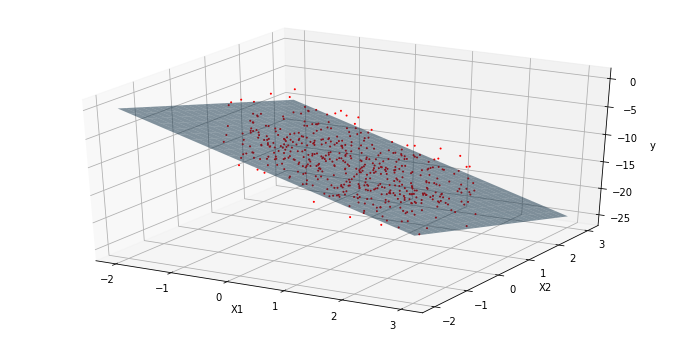

Red points are input data points: y


In [16]:
ax = plt.figure(figsize=(12, 6)).gca(projection='3d')
ax.plot_surface(xx, yy, zz, alpha=0.5)
ax.scatter(X1, X2, y, color='red', s=1, alpha=1)
ax.set(xlabel='X1', ylabel='X2', zlabel='y')

#ax.view_init(elev=30, azim=220)

plt.show()

print("Red points are input data points: y")

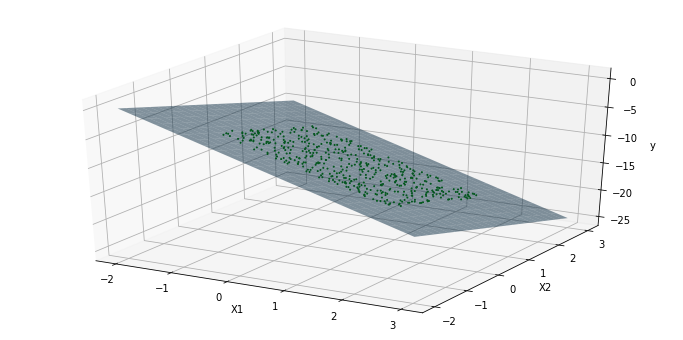

Green points are estimated (regressed) values (using Scikit-learn): y_hat   (on fitted plane)


In [17]:
ax = plt.figure(figsize=(12, 6)).gca(projection='3d')
ax.plot_surface(xx, yy, zz, alpha=0.5)
ax.scatter(X1, X2, y_hat, color='green', s=1, alpha=1)
ax.set(xlabel='X1', ylabel='X2', zlabel='y')

#ax.view_init(elev=30, azim=220)

plt.show()

print("Green points are estimated (regressed) values (using Scikit-learn): y_hat   (on fitted plane)")

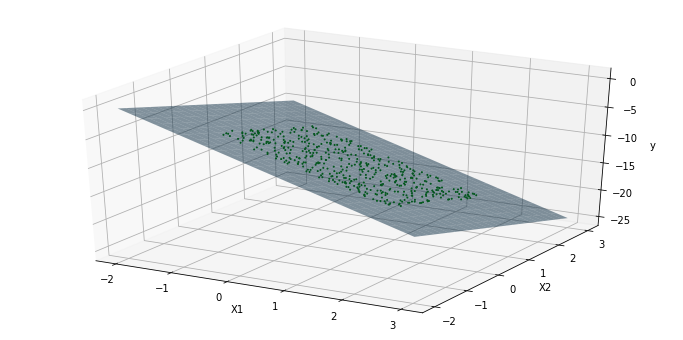

Green points are estimated (regressed) values (using Normal-Equation): y_hat   (on fitted plane)


In [18]:
# doing linear regression using Normal-Eqation  (note that we already constructed X_b and computed the w_estimate before)
y_hat = X_b.dot(w_estimate)

# plot the fitted data on a plane
ax = plt.figure(figsize=(12, 6)).gca(projection='3d')
ax.plot_surface(xx, yy, zz, alpha=0.5)
ax.scatter(X1, X2, y_hat, color='green', s=1, alpha=1)
ax.set(xlabel='X1', ylabel='X2', zlabel='y')

#ax.view_init(elev=30, azim=220)

plt.show()

print("Green points are estimated (regressed) values (using Normal-Equation): y_hat   (on fitted plane)")